## Chapter 5. Edge Detection

重要說明
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_gradients/py_gradients.html#one-important-matter
:當運算有牽涉+-運算時，若輸入影像是np.uint8，輸出影像要選更複雜的資料型態，以確保計算無誤。

### Image gradients by Sobel operator

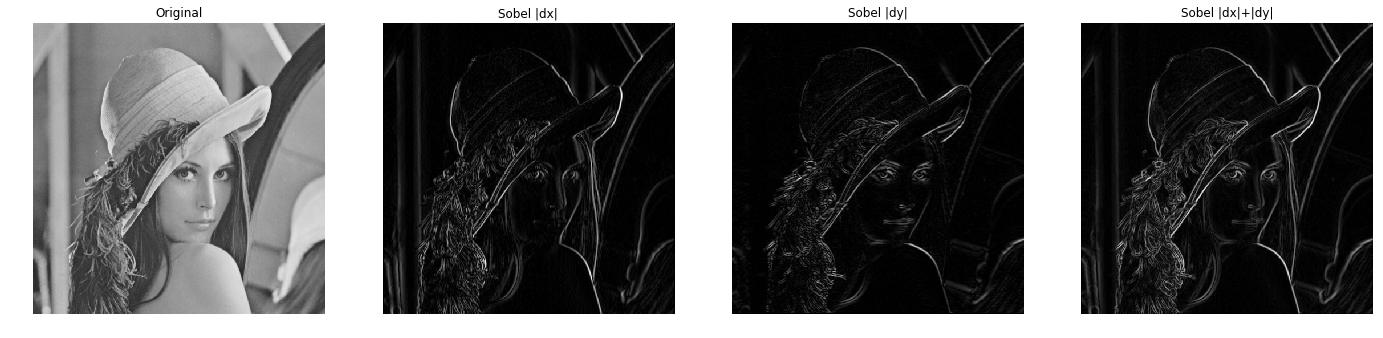

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
%matplotlib inline

image = cv2.imread('./test_data/lenna.png',cv2.IMREAD_GRAYSCALE)
sobel_dx = cv2.Sobel(image,cv2.CV_32F,1,0,ksize=5)
sobel_dy = cv2.Sobel(image,cv2.CV_32F,0,1,ksize=5)

plt.figure(figsize=(24,6))
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(image,norm=clr.NoNorm(0,255),cmap='gray')
plt.title('Original')

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(np.abs(sobel_dx),cmap='gray')
plt.title('Sobel |dx|')


plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(np.abs(sobel_dy),cmap='gray')
plt.title('Sobel |dy|')

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(np.abs(sobel_dx)+np.abs(sobel_dy),cmap='gray')
plt.title('Sobel |dx|+|dy|')

plt.show()

### Edge magnitude and orientation

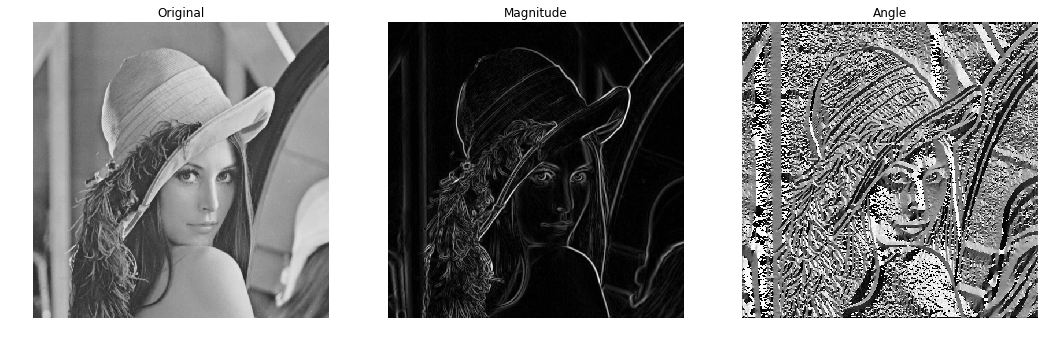

In [65]:
magnitude, angle = cv2.cartToPolar(sobel_dx,sobel_dy,angleInDegrees=True) 
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(image,norm=clr.NoNorm(0,255),cmap='gray')
plt.title('Original')


plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(magnitude,cmap='gray')
plt.title('Magnitude')

plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(angle,cmap='gray')
plt.title('Angle')
plt.show()

### Canny edge detector

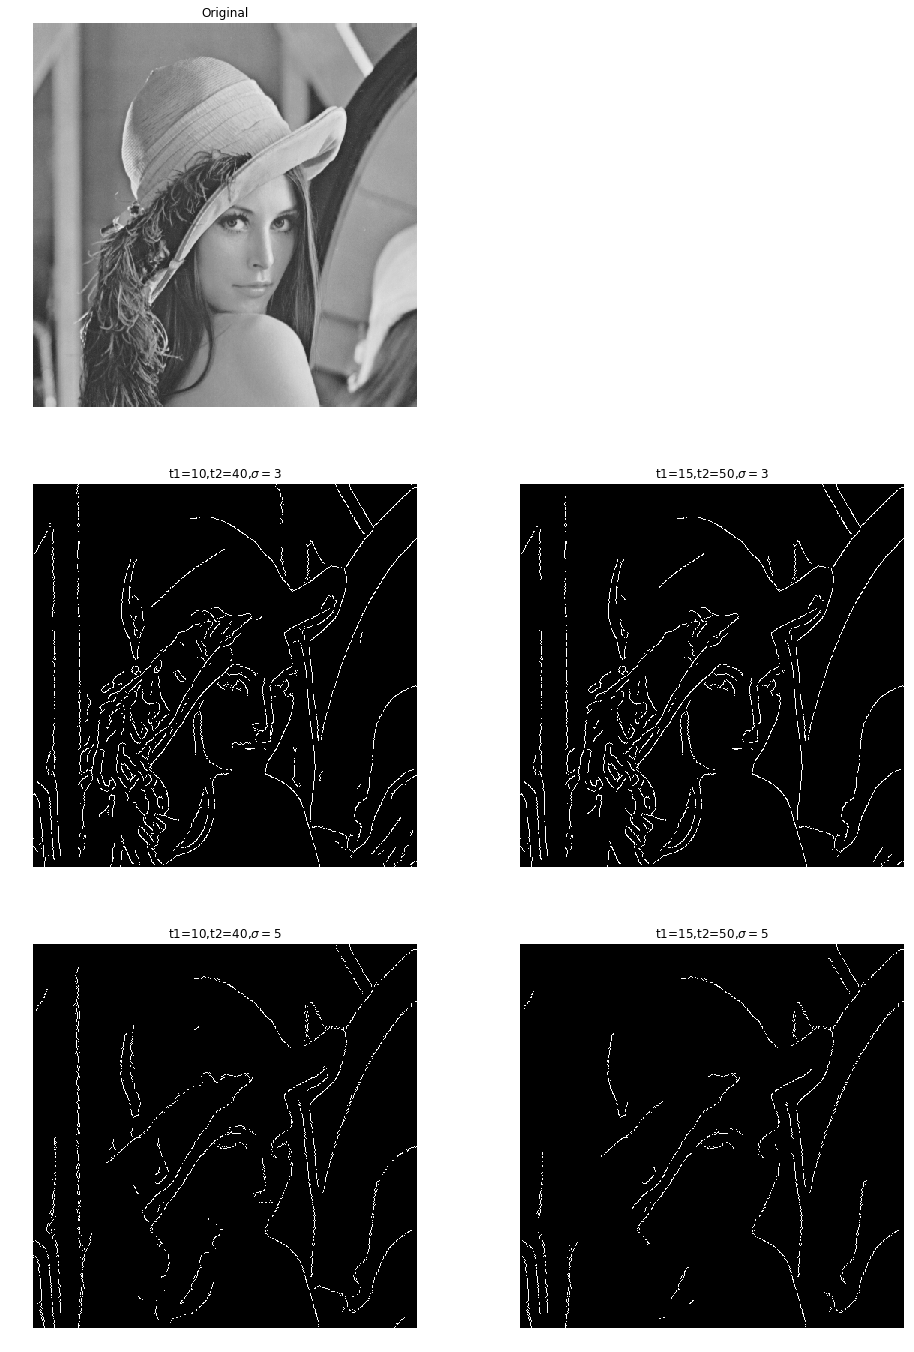

In [67]:
plt.figure(figsize=(16,24))

plt.subplot(3,2,1)
plt.axis('off')
plt.imshow(image,norm=clr.NoNorm(0,255),cmap='gray')
plt.title('Original')

for idx,(t1,t2,s) in enumerate([(10,40,3),(15,50,3),(10,40,5),(15,50,5)]):
    blur = cv2.GaussianBlur(image,(0,0),s)
    edge = cv2.Canny(blur, t1, t2)
    plt.subplot(3,2,idx+3)
    plt.axis('off')
    plt.imshow(edge,norm=clr.NoNorm(0,255),cmap='gray')
    plt.title('t1={},t2={},$\sigma=${}'.format(t1,t2,s))

plt.show()

### The Laplacian operator

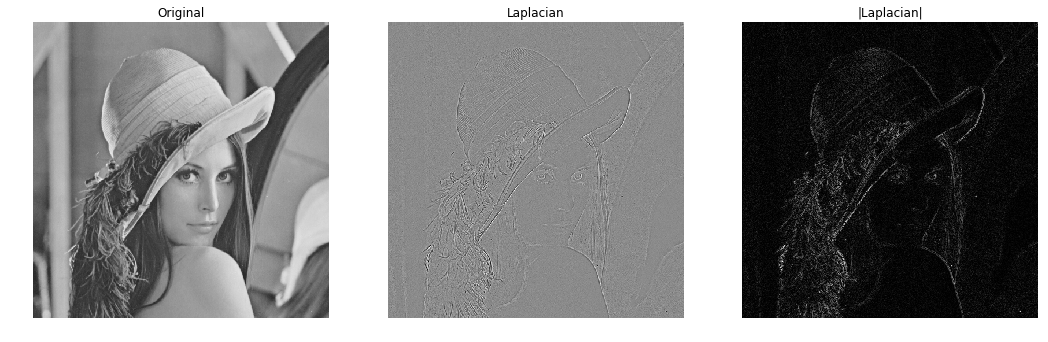

In [72]:
laplacian = cv2.Laplacian(image,cv2.CV_32F)
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(image,norm=clr.NoNorm(0,255),cmap='gray')
plt.title('Original')

plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian')


plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(np.abs(laplacian),cmap='gray')
plt.title('|Laplacian|')

plt.show()